In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz

df = pd.read_csv('petrol_consumption.csv')
df
X = df.drop('Petrol_Consumption', axis=1)
y = df[['Petrol_tax']]

In [19]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=30, random_state=42)

In [52]:
clf_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5, min_samples_leaf=5)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [53]:
y_predict = clf_model.predict(X_test)
y_predict

array([9, 7, 8, 9, 7, 7, 9, 7, 8, 9, 7, 7, 7, 8, 7, 7, 8, 8], dtype=int64)

In [54]:
metrics.accuracy_score(y_test, y_predict)

0.8888888888888888

In [64]:
target = list(df['Petrol_tax'].unique())
feature_names = list((X.columns))

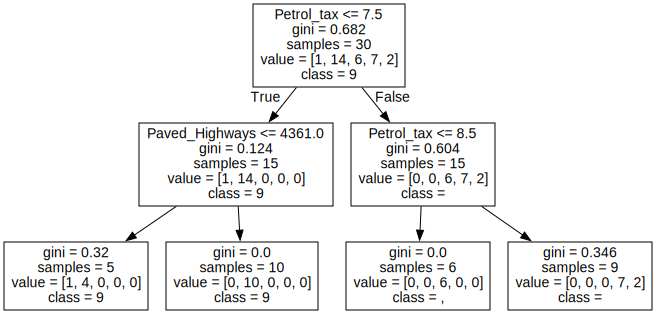

In [65]:
dot_data = tree.export_graphviz(clf_model, feature_names=feature_names, class_names=str(target))
graph = graphviz.Source(dot_data)
graph

In [66]:
importances = clf_model.feature_importances_
importances

array([0.98307475, 0.        , 0.01692525, 0.        ])

In [67]:
sorted_importances = pd.DataFrame({'feature': list(X_train.columns),
                                  'importances': clf_model.feature_importances_}).sort_values('importances', ascending=False)
sorted_importances

,feature,importances
0,Petrol_tax,0.983075
2,Paved_Highways,0.016925
1,Average_income,0.000000
3,Population_Driver_licence(%),0.000000
